In [1]:
import os

downloads = os.path.expanduser(r"~\Downloads")
print("Searching inside:", downloads)

matches = []
for root, dirs, files in os.walk(downloads):
    for d in dirs:
        if "cifar" in d.lower():
            matches.append(os.path.join(root, d))

print("\nFound folders containing 'cifar':", len(matches))
for m in matches:
    print(m)

Searching inside: C:\Users\ap571\Downloads

Found folders containing 'cifar': 0


In [5]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.8/331.9 MB 11.2 MB/s eta 0:00:30
   ---------------------------------------- 3.9/331.9 MB 10.7 MB/s eta 0:00:31
    --------------------------------------- 6.0/331.9 MB 9.7 MB/s eta 0:00:34
    --------------------------------------- 7.9/331.9 MB 9.6 MB/s eta 0:00:34
   - -------------------------------------- 10.2/331.9 MB 10.0 MB/s eta 0:00:33
   - -------------------------------------- 12.3/331.9 MB 10.0 MB/s eta 0:00:32
   - -------------------------------------- 14.7/331.9 MB 10.3 MB/s eta 0:00:31
   -- ------------------------------------- 16.8/331.9 MB 10.4 MB/s eta 0:00:31
   -- ------------------------------------- 19.4/331.9 MB 10.6 MB/s eta 0:00:30
   -- ------------------------------------- 21.8/331.9 MB 10.6 MB/s eta 0:00:30
   -- ------------------------------------- 24.1/331.9 MB 10.7 MB/s eta 0:00:29
   --- ------------------------------------ 26.7/331.9 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [9]:
from tensorflow.keras.datasets import cifar10
from PIL import Image
import os

# Create the folder in your Documents folder (safe & no permission issues)
base = os.path.join(os.path.expanduser("~"), "Documents", "cifar-10-img")
train_dir = os.path.join(base, "train")
test_dir  = os.path.join(base, "test")

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to save images class-wise
def save_split(x, y, out_dir, prefix):
    os.makedirs(out_dir, exist_ok=True)
    for i in range(len(x)):
        class_dir = os.path.join(out_dir, str(int(y[i][0])))
        os.makedirs(class_dir, exist_ok=True)
        Image.fromarray(x[i]).save(os.path.join(class_dir, f"{prefix}_{i}.png"))
    print(f"✅ Saved {len(x)} images in {out_dir}")

# Save training and test images
save_split(x_train, y_train, train_dir, "train")
save_split(x_test, y_test, test_dir, "test")

print("\n🎯 CIFAR-10 image folders created successfully!")
print("Train directory:", train_dir)
print("Test directory:", test_dir)

✅ Saved 50000 images in C:\Users\ap571\Documents\cifar-10-img\train
✅ Saved 10000 images in C:\Users\ap571\Documents\cifar-10-img\test

🎯 CIFAR-10 image folders created successfully!
Train directory: C:\Users\ap571\Documents\cifar-10-img\train
Test directory: C:\Users\ap571\Documents\cifar-10-img\test


In [11]:
import os
print("Train exists:", os.path.exists(train_dir))
print("Test exists:", os.path.exists(test_dir))
print("Train classes:", os.listdir(train_dir))

Train exists: True
Test exists: True
Train classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [21]:
import os
print(os.path.expanduser("~"))

C:\Users\ap571


In [23]:
train_dir = "C:\\Users\\ap571\\Documents\\cifar-10-img\\train"
test_dir  = "C:\\Users\\ap571\\Documents\\cifar-10-img\\test"

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [27]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.


In [29]:
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


In [31]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [35]:
import os; print(os.path.expanduser("~"))

C:\Users\ap571


In [43]:
weights_path = "C:\\Users\\ap571\\.keras\\models\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
import os
print(os.path.exists(weights_path))

False


In [45]:
import os
home = os.path.expanduser("~")
matches = []
for root, dirs, files in os.walk(home):
    for f in files:
        if f.lower().startswith("vgg") and f.lower().endswith(".h5"):
            matches.append(os.path.join(root, f))
print("Found:", matches or "No files found")

Found: No files found


In [47]:
weights_path = "C:\\Users\\ap571\\.keras\\models\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [49]:
import os
print(os.path.join(os.path.expanduser("~"), ".keras", "models"))

C:\Users\ap571\.keras\models


In [51]:
for layer in base_model.layers:
   layer.trainable = False

In [53]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.3020 - loss: 1.9311 - val_accuracy: 0.4620 - val_loss: 1.5851
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.4320 - loss: 1.5833 - val_accuracy: 0.4940 - val_loss: 1.4589
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.4840 - loss: 1.4662 - val_accuracy: 0.5060 - val_loss: 1.4327
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.5130 - loss: 1.3733 - val_accuracy: 0.5360 - val_loss: 1.3565
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.5320 - loss: 1.3156 - val_accuracy: 0.5460 - val_loss: 1.3354
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.5650 - loss: 1.2405 - val_accuracy: 0.5610 - val_loss: 1.3288
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.5824 - loss: 1.1858 - val_accuracy: 0.5630 - val_loss: 1.3200
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.6036 - loss: 1.1287 - val_accu

In [57]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


In [59]:
# CIFAR-10 label names in correct order
labels = [
    'airplane',  # 0
    'automobile',# 1
    'bird',      # 2
    'cat',       # 3
    'deer',      # 4
    'dog',       # 5
    'frog',      # 6
    'horse',     # 7
    'ship',      # 8
    'truck'      # 9
]

Preditcted:  ship
Actual:  ship


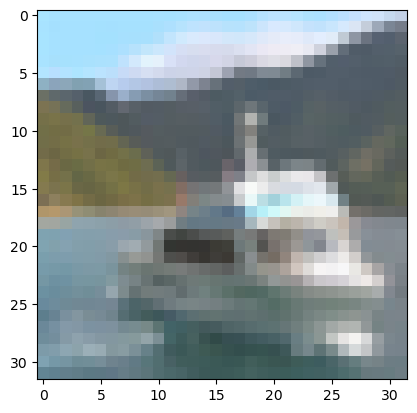

In [75]:
n = 700
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  cat
Actual:  cat


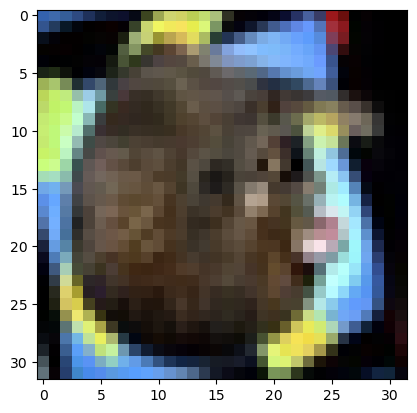

In [69]:
n = 590
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])